### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

###  Importing the datasets

In [2]:
train_data = pd.read_csv("train_file.csv")
train_data.head()


C:\Users\Swetaleena Satpathy\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
test_data = pd.read_csv("test_file.csv")
test_data.head()


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [4]:
train_data.shape

(85895, 32)

In [5]:
test_data.shape

(57239, 31)

In [6]:
final_submission = pd.DataFrame({'ID': test_data.ID})
final_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


### Data Inspection

In [7]:
#target variable count study
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [8]:
#To check for the not available data
train_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [9]:
test_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [10]:
#To check for the unique data
train_data.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [11]:
test_data.nunique()

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       36724
SITE NUMBER                            297
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               420
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2461
POLICE DISTRICT                         25
LICENSE CODE                           124
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       49383
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

# Data Preparation


In [12]:
#Extract date from datetime column
def ext_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [13]:
date_list = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE',
             'DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
ext_date(date_list)

In [14]:
#Extracting month and year to separate columns
train_data['PAYMENT YEAR'] = pd.DatetimeIndex(train_data['PAYMENT DATE']).year
train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = pd.DatetimeIndex(train_data['APPLICATION REQUIREMENTS COMPLETE']).year
train_data['DATE ISSUED YEAR'] = pd.DatetimeIndex(train_data['DATE ISSUED']).year
train_data['LICENSE TERM EXPIRATION YEAR'] = pd.DatetimeIndex(train_data['LICENSE TERM EXPIRATION DATE']).year
train_data['LICENSE TERM START YEAR'] = pd.DatetimeIndex(train_data['LICENSE TERM START DATE']).year
train_data['LICENSE APPROVED YEAR'] = pd.DatetimeIndex(train_data['LICENSE APPROVED FOR ISSUANCE']).year
train_data['LICENSE STATUS CHANGE YEAR'] = pd.DatetimeIndex(train_data['LICENSE STATUS CHANGE DATE']).year
train_data['PAYMENT MONTH'] = pd.DatetimeIndex(train_data['PAYMENT DATE']).month
train_data['APPLICATION REQUIREMENTS COMPLETE MONTH'] = pd.DatetimeIndex(train_data['APPLICATION REQUIREMENTS COMPLETE']).month
train_data['DATE ISSUED MONTH'] = pd.DatetimeIndex(train_data['DATE ISSUED']).month
train_data['LICENSE TERM EXPIRATION MONTH'] = pd.DatetimeIndex(train_data['LICENSE TERM EXPIRATION DATE']).month
train_data['LICENSE TERM START MONTH'] = pd.DatetimeIndex(train_data['LICENSE TERM START DATE']).month
train_data['LICENSE APPROVED MONTH'] = pd.DatetimeIndex(train_data['LICENSE APPROVED FOR ISSUANCE']).month
train_data['LICENSE STATUS CHANGE MONTH'] = pd.DatetimeIndex(train_data['LICENSE STATUS CHANGE DATE']).month

test_data['PAYMENT YEAR'] = pd.DatetimeIndex(test_data['PAYMENT DATE']).year
test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = pd.DatetimeIndex(test_data['APPLICATION REQUIREMENTS COMPLETE']).year
test_data['DATE ISSUED YEAR'] = pd.DatetimeIndex(test_data['DATE ISSUED']).year
test_data['LICENSE TERM EXPIRATION YEAR'] = pd.DatetimeIndex(test_data['LICENSE TERM EXPIRATION DATE']).year
test_data['LICENSE TERM START YEAR'] = pd.DatetimeIndex(test_data['LICENSE TERM START DATE']).year
test_data['LICENSE APPROVED YEAR'] = pd.DatetimeIndex(test_data['LICENSE APPROVED FOR ISSUANCE']).year
test_data['LICENSE STATUS CHANGE YEAR'] = pd.DatetimeIndex(test_data['LICENSE STATUS CHANGE DATE']).year
test_data['PAYMENT MONTH'] = pd.DatetimeIndex(test_data['PAYMENT DATE']).month
test_data['APPLICATION REQUIREMENTS COMPLETE MONTH'] = pd.DatetimeIndex(test_data['APPLICATION REQUIREMENTS COMPLETE']).month
test_data['DATE ISSUED MONTH'] = pd.DatetimeIndex(test_data['DATE ISSUED']).month
test_data['LICENSE TERM EXPIRATION MONTH'] = pd.DatetimeIndex(test_data['LICENSE TERM EXPIRATION DATE']).month
test_data['LICENSE TERM START MONTH'] = pd.DatetimeIndex(test_data['LICENSE TERM START DATE']).month
test_data['LICENSE APPROVED MONTH'] = pd.DatetimeIndex(test_data['LICENSE APPROVED FOR ISSUANCE']).month
test_data['LICENSE STATUS CHANGE MONTH'] = pd.DatetimeIndex(test_data['LICENSE STATUS CHANGE DATE']).month

In [15]:
drop_list=['LEGAL NAME','DOING BUSINESS AS NAME','APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE',
             'DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE', 'ID', 'LICENSE ID','ADDRESS', 'WARD PRECINCT','APPLICATION CREATED DATE','SSA','LOCATION']

In [16]:
train_data = train_data.drop(drop_list, axis = 1)
train_data.shape

(85895, 30)

In [17]:
test_data = test_data.drop(drop_list, axis = 1)
test_data.shape

(57239, 29)

### Imputing missing values

In [18]:
#Impute the missing data with avg of all values
def impute_avg(imp_list):
    
    for j in imp_list:
        train_data[j] = train_data[j].fillna(train_data[j].mean())
        test_data[j] = test_data[j].fillna(train_data[j].mean())

In [19]:
imp_list = ['LATITUDE','LONGITUDE']
impute_avg(imp_list)

In [20]:
def impute_round_avg(imp_rnd):
    for i in imp_rnd:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [21]:
imp_rnd = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'DATE ISSUED YEAR', 'LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'LICENSE APPROVED YEAR','LICENSE STATUS CHANGE YEAR', 
           'PAYMENT MONTH', 'APPLICATION REQUIREMENTS COMPLETE MONTH', 'DATE ISSUED MONTH' ,'LICENSE TERM EXPIRATION MONTH', 'LICENSE TERM START MONTH', 'LICENSE APPROVED MONTH','LICENSE STATUS CHANGE MONTH']
impute_round_avg(imp_rnd)

In [22]:
def impute_zero(imp_zero_list):
    for i in imp_zero_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

In [23]:
imp_zero_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE NUMBER', 'ZIP CODE']
impute_zero(imp_zero_list)

### Clubbing of similar classes from the column 'LICENSE DESCRIPTION'

In [24]:
train_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        50078
Home Repair                                                     10633
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1952
Street Performer                                                 1889
Scavenger, Private                                               1549
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Motor Vehicle Repair : Engine Only (Class II)                     931
Automatic Amusement Device Operator                               773
Peddler, food (fruits and vegtables only)                         582
Mobile Food Dispenser                                             525
Manufacturing Establ

In [25]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace(' Motor Vehicle Services License', 'Motor Vehicle Repair')


train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')

train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Junk Peddler','Peddler')


train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Navy Pier - Mobile', 'Navy Pier')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Navy Pier Vendor (Non-Food)', 'Navy Pier')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Navy Pier - Outdoor Fixed ', 'Navy Pier')

train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Massage Therapist', 'Massage Service')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Massage Establishment', 'Massage Service')


In [26]:
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace(' Motor Vehicle Services License', 'Motor Vehicle Repair')


test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')

test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Junk Peddler','Peddler')


test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Navy Pier - Mobile', 'Navy Pier')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Navy Pier Vendor (Non-Food)', 'Navy Pier')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Navy Pier - Outdoor Fixed ', 'Navy Pier')

test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Massage Therapist', 'Massage Service')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Massage Establishment', 'Massage Service')


### Encoding the non numeric values

In [27]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REA', 3)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)

In [28]:
def encoding(dataf):
    for i in dataf.columns:
        if dataf[i].dtypes=='object':  
            print('encoding', i)
            try:
                dataf[i] = LabelEncoder().fit_transform(dataf[i])
                
            except Exception as e:
                print(e)
    return dataf

In [29]:
train_data = encoding(train_data)

encoding CITY
encoding STATE
encoding ZIP CODE
argument must be a string or number
encoding LICENSE DESCRIPTION
encoding APPLICATION TYPE
encoding CONDITIONAL APPROVAL


In [30]:
test_data = encoding(test_data)

encoding CITY
encoding STATE
encoding LICENSE DESCRIPTION
encoding APPLICATION TYPE
encoding CONDITIONAL APPROVAL


In [31]:
train_data["ZIP CODE"] = LabelEncoder().fit_transform(train_data["ZIP CODE"].astype(str))
test_data["ZIP CODE"] = LabelEncoder().fit_transform(test_data["ZIP CODE"].astype(str))

## Sampling the data to limit skewing of model from one category of dependent variable


In [32]:
#To know the value counts of each data in the License Status Column
train_data['LICENSE STATUS'].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

### Oversampling of INQ and REA data AND undersampling of AAC and AAI data to produce an overall balanced data. 

In [33]:
#Shuffling of data
train_data = train_data.sample(frac=1)

#Creating subsamples
license_inq = train_data[train_data['LICENSE STATUS'] == 4]
license_rea = train_data[train_data['LICENSE STATUS'] == 3]
license_rev = train_data[train_data['LICENSE STATUS'] == 2]
license_aac = train_data[train_data['LICENSE STATUS'] == 1][:300]
license_aai = train_data[train_data['LICENSE STATUS'] == 0][:300]

#Concating the subsamples to get the new dataframe
distributed_df = pd.concat([license_inq, license_inq, license_inq, license_inq, license_inq,
                            license_inq, license_rea, license_rea, license_rea,
                            license_rea, license_rev, license_aac, license_aai])

#Shuffling again
new_dist_df = distributed_df.sample(frac=1)

new_dist_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE MONTH,DATE ISSUED MONTH,LICENSE TERM EXPIRATION MONTH,LICENSE TERM START MONTH,LICENSE APPROVED MONTH,LICENSE STATUS CHANGE MONTH
22059,60752,17,193,16,1550,33.0,21.0,17.0,1316,45,1739149.0,4,0,41.958152,-87.708001,1,2011.0,2011.0,2011,2013.0,2011.0,2011.0,2012.0,4.0,3.0,4,5.0,5.0,4.0,12.0
80153,249850,2,833,16,1066,0.0,0.0,0.0,1011,30,1331914.0,3,0,41.880952,-87.681165,4,2007.0,2003.0,2003,2004.0,2003.0,2003.0,2003.0,5.0,9.0,7,2.0,9.0,7.0,9.0
41332,373264,1,193,16,1599,28.0,0.0,0.0,1006,69,2162235.0,4,0,41.880490,-87.754433,2,2014.0,2014.0,2014,2016.0,2014.0,2014.0,2016.0,6.0,5.0,6,7.0,7.0,6.0,7.0
51509,23501,2,193,16,1586,13.0,17.0,8.0,1010,40,1800655.0,4,0,41.778100,-87.764965,1,2011.0,2011.0,2011,2013.0,2011.0,2011.0,2012.0,9.0,8.0,9,10.0,10.0,9.0,8.0
63323,336108,3,193,16,1545,11.0,42.0,9.0,1010,40,1968759.0,4,0,41.838012,-87.640424,2,2010.0,2010.0,2010,2012.0,2010.0,2010.0,2012.0,6.0,4.0,6,6.0,6.0,6.0,3.0


In [34]:
new_dist_df['LICENSE STATUS'].value_counts()

1    300
0    300
2    290
4     12
3     12
Name: LICENSE STATUS, dtype: int64

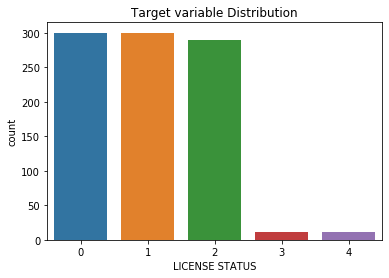

In [35]:
#Plotting a graph to better visualise the data
plt.title('Target variable Distribution')
sns.countplot(new_dist_df['LICENSE STATUS'])
plt.show()

In [36]:
#Separation of dependent and independent variable columns
X_data = new_dist_df.drop('LICENSE STATUS', axis=1)
Y_data = new_dist_df['LICENSE STATUS']

In [37]:
#Test-Train sets splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data,Y_data, test_size = 0.30)

In [38]:
#Building a XGBoost Model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(learning_rate=0.02, n_estimators=1000)
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.36%


In [39]:
# Predicting on the test dataset
test_pred = model.predict(test_data)

In [40]:
final_submission['LICENSE STATUS'] = test_pred

In [41]:

final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(0, 'AAI')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(1, 'AAC')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(2, 'REV')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(3, 'REA')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(4, 'INQ')

In [42]:
#Saving file
final_submission.to_csv('sample_submissions.csv', index=False)